In [9]:
# 1. 📦 Librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuraciones generales
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [10]:
def limpiar_datos(df):
    # 1. ✅ Renombrar columnas clave
    df = df.rename(columns={
        'churn': 'cancelacion',
        'customerid': 'id_cliente',
        'account_contract': 'tipo_contrato',
        'account_paperlessbilling': 'facturacion_electronica',
        'account_paymentmethod': 'metodo_pago',
        'account_monthlycharges': 'cargo_mensual',
        'account_totalcharges': 'cargo_total',
        'customer_gender': 'genero',
        'customer_seniorcitizen': 'adulto_mayor',
        'customer_dependents': 'tiene_dependientes',
        'customer_partner': 'tiene_pareja',
        'internet_internetservice': 'tipo_internet',
        'internet_onlinesecurity': 'seguridad_online',
        'internet_onlinebackup': 'respaldo_online',
        'internet_deviceprotection': 'proteccion_dispositivo',
        'internet_techsupport': 'soporte_tecnico',
        'internet_streamingtv': 'tv_streaming',
        'internet_streamingmovies': 'peliculas_streaming',
        'phone_phoneservice': 'tiene_telefono',
        'phone_multiplelines': 'lineas_multiples'
    })

    # 2. ✅ Traducir valores de cancelación
    df['cancelacion'] = df['cancelacion'].map({'Yes': 'Canceló', 'No': 'Retenido'})

    # 3. ✅ Traducir valores booleanos comunes
    booleanas = [
        'facturacion_electronica', 'tiene_dependientes', 'tiene_pareja',
        'seguridad_online', 'respaldo_online', 'proteccion_dispositivo',
        'soporte_tecnico', 'tv_streaming', 'peliculas_streaming',
        'tiene_telefono', 'lineas_multiples'
    ]
    for col in booleanas:
        if col in df.columns:
            df[col] = df[col].replace({'Yes': 'Sí', 'No': 'No'})

    # 4. ✅ Adulto mayor como texto
    if 'adulto_mayor' in df.columns:
        df['adulto_mayor'] = df['adulto_mayor'].map({0: 'No', 1: 'Sí'})

    return df

In [12]:
# 2. 📂 Cargar datos
df = pd.read_csv("../data/datos_telecomx.csv")
df = limpiar_datos(df)
df.head()

,id_cliente,cancelacion,genero,adulto_mayor,tiene_pareja,tiene_dependientes,customer_tenure,tiene_telefono,lineas_multiples,tipo_internet,...,respaldo_online,proteccion_dispositivo,soporte_tecnico,tv_streaming,peliculas_streaming,tipo_contrato,facturacion_electronica,metodo_pago,account_charges.monthly,account_charges.total
0,0002-ORFBO,Retenido,Female,No,Sí,Sí,9,Sí,No,DSL,...,Sí,No,Sí,Sí,No,One year,Sí,Mailed check,65.6,593.3
1,0003-MKNFE,Retenido,Male,No,No,No,9,Sí,Sí,DSL,...,No,No,No,No,Sí,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Canceló,Male,No,No,No,4,Sí,No,Fiber optic,...,No,Sí,No,No,No,Month-to-month,Sí,Electronic check,73.9,280.85
3,0011-IGKFF,Canceló,Male,Sí,Sí,No,13,Sí,No,Fiber optic,...,Sí,Sí,No,Sí,Sí,Month-to-month,Sí,Electronic check,98.0,1237.85
4,0013-EXCHZ,Canceló,Female,Sí,Sí,No,3,Sí,No,Fiber optic,...,No,No,Sí,Sí,No,Month-to-month,Sí,Mailed check,83.9,267.4


# ***📌 Paso 1: Exploración inicial***

In [13]:
# 3. 🔍 Información general
print('Información general del DataFrame')
df.info()


Información general del DataFrame
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id_cliente               7267 non-null   object 
 1   cancelacion              7043 non-null   object 
 2   genero                   7267 non-null   object 
 3   adulto_mayor             7267 non-null   object 
 4   tiene_pareja             7267 non-null   object 
 5   tiene_dependientes       7267 non-null   object 
 6   customer_tenure          7267 non-null   int64  
 7   tiene_telefono           7267 non-null   object 
 8   lineas_multiples         7267 non-null   object 
 9   tipo_internet            7267 non-null   object 
 10  seguridad_online         7267 non-null   object 
 11  respaldo_online          7267 non-null   object 
 12  proteccion_dispositivo   7267 non-null   object 
 13  soporte_tecnico          7267 non-null   obj

In [14]:
# 4. 📊 Valores únicos por columna
print('Valores únicos por columna')
df.nunique().sort_values()

Valores únicos por columna


cancelacion                   2
genero                        2
adulto_mayor                  2
tiene_pareja                  2
tiene_telefono                2
tiene_dependientes            2
facturacion_electronica       2
tipo_internet                 3
proteccion_dispositivo        3
soporte_tecnico               3
seguridad_online              3
respaldo_online               3
tv_streaming                  3
peliculas_streaming           3
tipo_contrato                 3
lineas_multiples              3
metodo_pago                   4
customer_tenure              73
account_charges.monthly    1585
account_charges.total      6531
id_cliente                 7267
dtype: int64

In [15]:
# 5. ❌ Valores nulos
print('Valores nulos')
df.isnull().sum().sort_values(ascending=False)

Valores nulos


cancelacion                224
id_cliente                   0
genero                       0
adulto_mayor                 0
tiene_pareja                 0
tiene_dependientes           0
customer_tenure              0
tiene_telefono               0
lineas_multiples             0
tipo_internet                0
seguridad_online             0
respaldo_online              0
proteccion_dispositivo       0
soporte_tecnico              0
tv_streaming                 0
peliculas_streaming          0
tipo_contrato                0
facturacion_electronica      0
metodo_pago                  0
account_charges.monthly      0
account_charges.total        0
dtype: int64

# ***📌 Paso 2: Distribución de la variable objetivo (churn)***

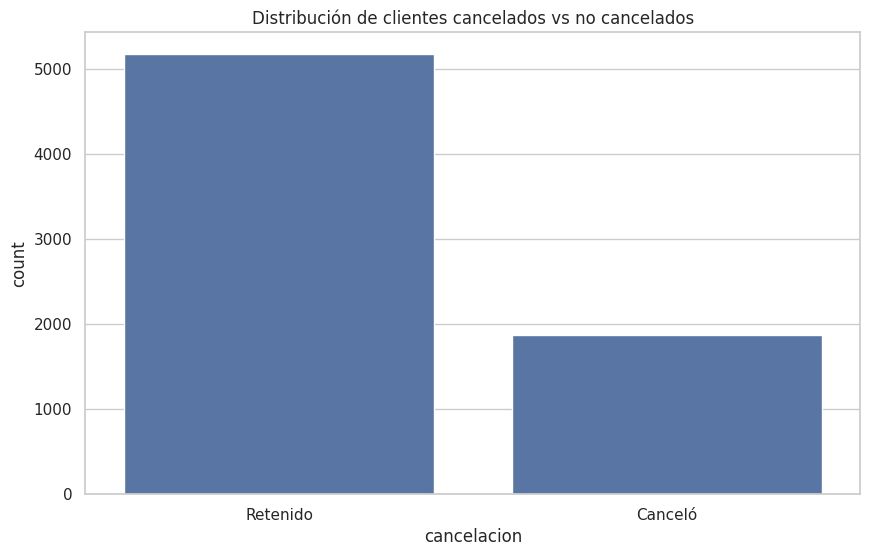

cancelacion
Retenido    0.73463
Canceló     0.26537
Name: proportion, dtype: float64

In [17]:
# 6. 📈 Distribución general
sns.countplot(x="cancelacion", data=df)
plt.title("Distribución de clientes cancelados vs no cancelados")
plt.show()

# Proporción
df["cancelacion"].value_counts(normalize=True)
